<a href="https://colab.research.google.com/github/jayshah18/GEN_AI-Learning/blob/main/GENAI____IMDB_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data_path = "/content/IMDB Dataset.csv"

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
# For simplicity of preprocessing just take 100 data values
df = df.head(100)

In [ ]:
df.shape

(100, 2)

In [ ]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

**Lower Case**

In [ ]:
df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [ ]:
df['review'] = df['review'].str.lower()

In [ ]:
df

review sentiment
0   one of the other reviewers has mentioned that ...  positive
1   a wonderful little production. <br /><br />the...  positive
2   i thought this was a wonderful way to spend ti...  positive
3   basically there's a family where a little boy ...  negative
4   petter mattei's "love in the time of money" is...  positive
..                                                ...       ...
95  daniel day-lewis is the most versatile actor a...  positive
96  my guess would be this was originally going to...  negative
97  well, i like to watch bad horror b-movies, cau...  negative
98  this is the worst movie i have ever seen, as w...  negative
99  i have been a mario fan for as long as i can r...  positive

[100 rows x 2 columns]

In [ ]:
df['review'][3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

**Removal of HTML Tags**

In [ ]:
import re
def removal_tags(text):
  pattern = re.compile('<.*?>') # pattern is like < ANYTHING inside tag >
  return pattern.sub(r'',text) # from Text if pattern is matched then it will substitute or replace it with ''

In [ ]:
df['review'] = df['review'].apply(removal_tags)

In [ ]:
df.head()

review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. the filming tec...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive

**Removal or URLs**

In [ ]:
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

In [ ]:
text = "my Linkedin is : https://www.linkedin.com/feed/"
new_txt = remove_url(text)
print(new_txt)

my Linkedin is : 


**Punctuation Removal**

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation


In [ ]:
def removal_punc(text):
  for char in exclude:
    text = text.replace(char,'')
  return text

In [ ]:
import time
text = "String, with. Punctuation>?"
print(text)
start = time.time()
new_text = removal_punc(text)
total =time.time() - start
print(new_text)
print("total time: ", total)

String, with. Punctuation>?
String with Punctuation
total time:  0.00011897087097167969


In [ ]:
def built_in(text):
  return text.translate(str.maketrans('','',exclude))  # Less time consuming

text = "String, with. Punctuation>?"
print(text)
start = time.time()
new_text = built_in(text)
total =time.time() - start
print("total time: ", total)

String, with. Punctuation>?
total time:  0.00011467933654785156


In [ ]:
df['review'][5]

'probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times in the last 25 years. paul lukas\' performance brings tears to my eyes, and bette davis, in one of her very few truly sympathetic roles, is a delight. the kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. and the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. if i had a dozen thumbs, they\'d all be "up" for this movie.'

In [ ]:
df['review'][5] = built_in(df['review'][5])
df['review'][5]

/tmp/ipython-input-3042134769.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['review'][5] = built_in(df['review'][5])


'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'

**Incorrect Text Handling**

In [ ]:
from textblob import TextBlob

In [ ]:
incorrect = "soome beleives the suprise party is happining on Friday."
text_blb = TextBlob(incorrect)
text_blb.correct().string

'some believes the surprise party is happening on Friday.'

Stopwords


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english') # Stopwords has no meaning for generating correct results

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
text = "i just watched this movie, it is a Awsome. i loved it"
stoping_words = stopwords.words('english')
def remove_stopwords(text):
  new_text = []
  for char in text.split():
    if(char in stoping_words):
      new_text.append('')
    else:
      new_text.append(char)
  text = ' '.join(new_text) # to convert it into a string from a list
  return text
print(remove_stopwords(text)) # Only useful words for sentiment analysis

  watched  movie,    Awsome.  loved 


In [ ]:
df['review'] = df['review'].apply(remove_stopwords)

In [ ]:
df.sample(5)

review sentiment
48  preston sturgis'  power   glory  unseen   publ...  positive
31  "ardh satya"  one   finest film ever made  ind...  positive
77  maybe    title,   trailer (certainly   intervi...  negative
67   really like salman kahn    really disappointe...  negative
83  "fate" leads walter sparrow  come  possession ...  negative

Handling Emojis


In [ ]:
def remove_emoji(text):
  pattern = re.compile(r"[\U0001F600\u2764\ufe0f\U0001F389\U0001F40D]")
  return pattern.sub(r'', text)
text = "Hello 😀❤️🎉🐍 😎!"
print(remove_emoji(text))
# Emojis are unicodes, so just remove that unicodes from the text

Hello  😎!


In [ ]:
# To understand meaning of Emojies like chatgpt
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 30.2 MB/s eta 0:00:00


In [ ]:
import emoji
print(emoji.demojize("Jay is a 🔥"))

Jay is a :fire:


In [ ]:
print(emoji.demojize("Python is 👍"))

Python is :thumbs_up:


***Tokenization***

In [ ]:
text = "I am going to delhi. It was fun!"
text.split() # Word level tokenization

['I', 'am', 'going', 'to', 'delhi.', 'It', 'was', 'fun!']

In [ ]:
text.split('.') # Sentence level tokenization

['I am going to delhi', ' It was fun!']

In [ ]:
# We can use regular expression import re and do that too!
# we can use nltk library as well
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
word_tokenize(text)

['I', 'am', 'going', 'to', 'delhi', '.', 'It', 'was', 'fun', '!']

In [ ]:
sent_tokenize(text)

['I am going to delhi.', 'It was fun!']

In [ ]:
# we can also do tokenization using import Spacy

**Steemer : It converts all words to it's root word**

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
text = 'walks walked walking'
new_text = []
for word in text.split():
  new_text.append(ps.stem(word))
print(', '.join(new_text))

walk, walk, walk




---



# Bag Of Words

Corpus => Collection of all words in the dataset

1.   it will associate frequency of that word in the sentence
2.   Example, corpus = (people watch movie jay amazing wow)

Then sentence "Amazing movie, Amazing hero Jay"              
written as=>  corpus(0,0,1,1,1,2,0) determines people coming 0 times from the corpus, so on.





In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dict = {
    "text": ['amazing starcast, loved movie amazing','amazing movie watch', 'watch starcast movie','people loved movie'],
    "output":[1,1,0,0]
}
#output is random column

In [ ]:
df = pd.DataFrame(dict)
df.head()

text  output
0  amazing starcast, loved movie amazing       1
1                    amazing movie watch       1
2                   watch starcast movie       0
3                     people loved movie       0

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
ans = cv.fit_transform(df['text'])

In [ ]:
cv.vocabulary_ # total no of words with random index

{'amazing': 0, 'starcast': 4, 'loved': 1, 'movie': 2, 'watch': 5, 'people': 3}

index will be in this order [amazing, loved, movie, people, starcast, watch]

In [ ]:
ans.toarray()
# first is [2(count of amazing),1,1,0(count of people),1,0(count of watch)] in the first text

array([[2, 1, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 1, 1, 1, 0, 0]])

In [ ]:
# NEW Data
cv.transform(['I have loved this movie, it is amazing and loved by mom too']).toarray()
# amazing, movie => 1 time, and loved 2 times

array([[1, 2, 1, 0, 0, 0]])

we use ngram_range((2,2)) if we want the frequency of pair of words
*   They are used in cases like (good,movie) & [(not, good)+(movie,'')]
*   Not good must be in a pair to identify it that it was a negative response.



Drawback => it generates sparse array


# TF-IDF : term frequency - inverse document frequency


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
arr = tfidf.fit_transform(df['text']).toarray()

It assigns some weights on the words based on the frequency.

In [ ]:
arr

array([[0.78822681, 0.39411341, 0.26085962, 0.        , 0.39411341,
        0.        ],
       [0.64043405, 0.        , 0.42389674, 0.        , 0.        ,
        0.64043405],
       [0.        , 0.        , 0.42389674, 0.        , 0.64043405,
        0.64043405],
       [0.        , 0.5728925 , 0.37919167, 0.72664149, 0.        ,
        0.        ]])

Both TFIDF and Bag of words => can not determine the order of words in the sentence. OR which word comes before and after in the sentence.

# Word to Vec (DL approach)

DL algo has extracted the features gender, wealth, power etc. we have some words in the corpus.
1. It will assign values as king has gender 1, queen has gender 0. monkey has wealth 0, etc.





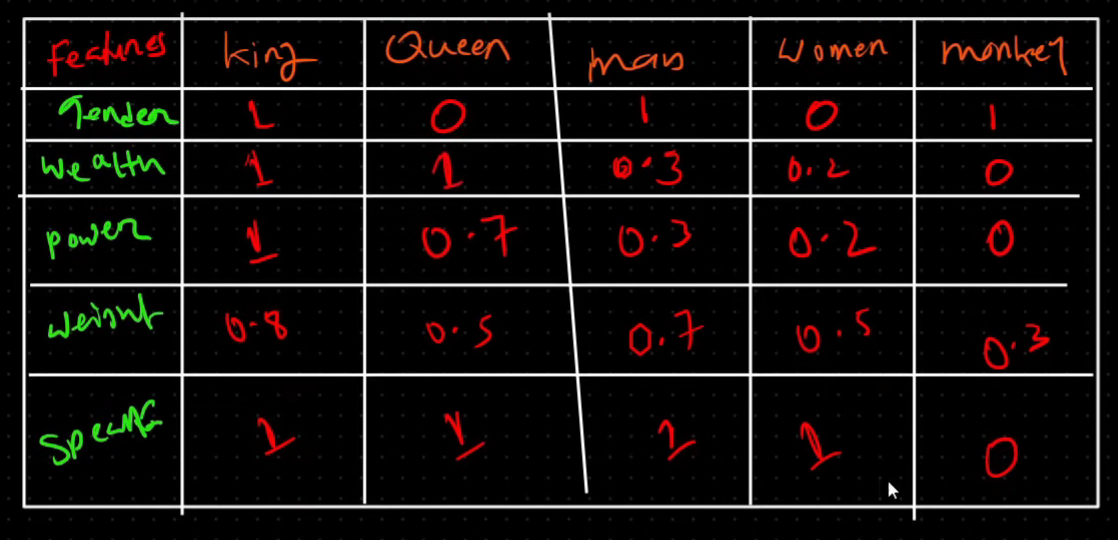

When we give new sentence "I am a princess" then it will classify it in king-queen cluster as princess will has bit similar values as king-queen.

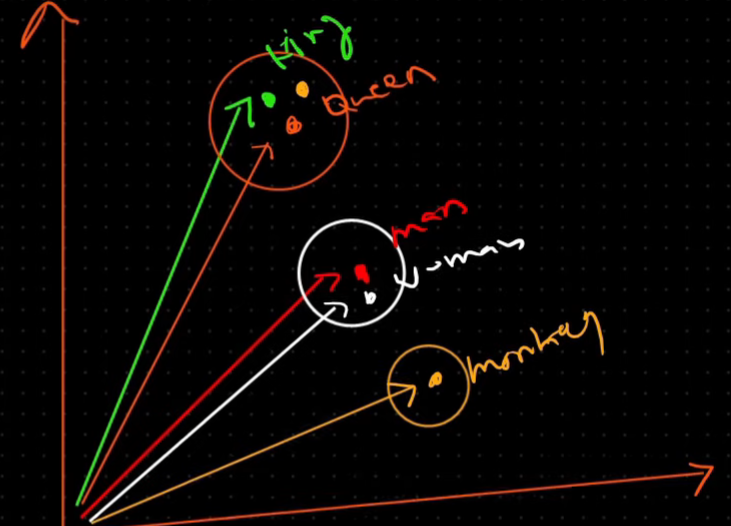

Word2vec converts the text data into vectors of higher dimensions such that, words with the same meanings are close together.

It uses mainly 2 architectures:


1.   CBOW (continuous - bag of words)
2.   Skip-gram


```

from gensim.models import Word2Vec

sentences = [
    ["I", "love", "machine", "learning"],
    ["machine", "learning", "is", "fun"],
    ["I", "enjoy", "learning", "new", "things"]
]
```
```
model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=1)
```


*   vector_size=10 → each word is represented by a 10-dimensional vector.
*   window=2 → the context window size for predicting words.(not,good) (very, good), etc
*   min_count=1 → ignore words with frequency less than 1.
*   sg=1 → use skip-gram (if 0, it uses CBOW).

```
vector = model.wv['machine']
print("Vector for 'machine':\n", vector)
```
above code prints 10D array which represents a word 'machine'
```
similar_words = model.wv.most_similar('learning', topn=3)
print("\nWords similar to 'learning':", similar_words)
```
most_similar('learning', topn=3) prints 3 most similar words based on the vectors

**KNN Imputer**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']
df = df[cols]

In [ ]:
df.head()

Survived  Pclass   Age  SibSp  Parch
0         0       3  22.0      1      0
1         1       1  38.0      1      0
2         1       3  26.0      0      0
3         1       1  35.0      1      0
4         0       3  35.0      0      0

In [ ]:
from sklearn.impute import KNNImputer


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)

In [ ]:
kn = KNNImputer(n_neighbors=5, weights='distance')

In [ ]:
X_train_trf = kn.fit_transform(X_train)

In [ ]:
X_test_trf = kn.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_trf, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test_trf)

In [ ]:
accuracy_score(y_pred, y_test)

0.7430167597765364

# Extra


In [ ]:
!pip install openai

In [ ]:
from openai import OpenAI

# Initialize the client
client = OpenAI(api_key="sk....--...") # I don't have any paid subscription

prompt = "Write a short poem about sunrise."

# Generate text using the GPT model
response = client.chat.completions.create(
    model="gpt-4o-mini",  # We can use other GPT models as well
    messages=[
        {"role": "system", "content": "You are a creative poet."},
        {"role": "user", "content": prompt}
    ]
)


print(response.choices[0].message.content)
# will show error as I don't have any paid subscription

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk....--.... You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

# Text Classification using ML

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
import string
from sklearn.model_selection import train_test_split


In [ ]:
import re
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv', on_bad_lines='skip')

In [ ]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Basic Preprocessing


1.   Removal of HTML tags, and stopwords
2.   lower case
3.   removing null, duplicates etc
4.   taken only 10k reviews



In [ ]:
df.shape

(77849, 2)

In [ ]:
df = df.iloc[:10000]

In [ ]:
df.shape

(10000, 2)

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(13)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import re
def removal_tags(text):
  pattern = re.compile('<.*?>') # pattern is like < ANYTHING inside tag >
  return pattern.sub(r'',text) # from Text if pattern is matched then it will substitute or replace it with ''

In [ ]:
df['review'] = df['review'].apply(removal_tags)

In [ ]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. The filming tec...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
stoping_words = stopwords.words('english')
def remove_stopwords(text):
  new_text = []
  for char in text.split():
    if(char in stoping_words):
      new_text.append('')
    else:
      new_text.append(char)
  text = ' '.join(new_text) # to convert it into a string from a list
  return text

In [ ]:
df['review'] = df['review'].apply(remove_stopwords)

In [ ]:
df.shape

In [ ]:
df.head() # See difference

review sentiment
0  One    reviewers  mentioned   watching  1 Oz e...  positive
1  A wonderful little production. The filming tec...  positive
2  I thought    wonderful way  spend time    hot ...  positive
3  Basically there's  family   little boy (Jake) ...  negative
4  Petter Mattei's "Love   Time  Money"   visuall...  positive

In [ ]:
df['review'] = df['review'].str.lower()
df.head()

review sentiment
0  one    reviewers  mentioned   watching  1 oz e...  positive
1  a wonderful little production. the filming tec...  positive
2  i thought    wonderful way  spend time    hot ...  positive
3  basically there's  family   little boy (jake) ...  negative
4  petter mattei's "love   time  money"   visuall...  positive

Splitting data

In [ ]:
X = df['review']
y = df['sentiment']
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    negative
9998    negative
9999    positive
Name: sentiment, Length: 9983, dtype: object

In [ ]:
# y must be converted into numerical format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
y

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(7989,)

In [ ]:
X_test.shape

(1998,)

### Bag of words


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()


ML Model: Naive Bayes (Gaussian)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_bow, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test_bow)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_pred, y_test))

0.6286286286286287


In [ ]:
print(confusion_matrix(y_pred,y_test))

[[720 461]
 [281 536]]


Applying Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_bow, y_train)

y_pred = rf_classifier.predict(X_test_bow)

In [ ]:
print(accuracy_score(y_pred, y_test))

0.8473473473473474


N Grams in BOW

In [ ]:
# Go to Kaggle as colab not able to run : https://www.kaggle.com/code/shahjaysuhasbhai/imdb-textclassification/edit

TFIDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_classifier.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.85678517776665

In [ ]:
# Best to use TFIDF

Theory on LLMs
1. Introduction & Architecture
2. Intro to Hugging Face
3. Transformer Attention
4. Revision of all till now, must be needed after this

## Text Classification using GPT2 Model & GPT2Tokenizer from Hugging Face

In [1]:
#Importing the GPT-2 model (for text generation) and its tokenizer (for converting text ↔ tokens).
from transformers import GPT2LMHeadModel, GPT2Tokenizer
#Making an object of pre-trained GPT-2 tokenizer from Hugging Face’s model hub.
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

#similarly making object for GPT model
model = GPT2LMHeadModel.from_pretrained("gpt2")

#input can be taken on my own
prompt = "Once upon a time in Gujarat,"

# Converts the prompt into token IDs and returns them as PyTorch tensors
inputs = tokenizer(prompt, return_tensors="pt")

# written whole generation and theory part in notebook
outputs = model.generate(**inputs, max_length=50, temperature=0.7, do_sample=True)
print("Output of GPT: ")
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output of GPT: 
Once upon a time in Gujarat, I was very much a Muslim… I would visit the mosque of Allahabad and pray there many times. I was also very much a Muslim. I had a very good understanding of Islam."

He said,
